# **ELIXIR Spatial Transcriptomics Course**

Author: George Gavriilidis

Date: 2025-02-21

Author email: ggeorav@certh.gr

# Practical 0: Data Formats

### Quiz: Pre-Workshop Check

1. What is a `SpatialData` object?  

2. Which file formats are commonly used for spatial transcriptomics?  

3. What are the main advantages of using `SpatialData` objects over plain tables or data frames?

4. Can you reflect on the similarities and differences among Visium, Visium HD, MERFISH and Xenium data structures via the `SpatialData` framework?
 

# Introduction to `SpatialData` objects

⚠️ Adjust the variable below to the data path on your specific workstation.

### Hands-On Exercise:
Run the cell below and explore the files available in the `data/` directory. What do you notice about the file types?
```python
!ls data/
```


In [ ]:
# !ls data/

In [7]:
# mkdir "data/"

In [17]:
# data_path = "./data/"

In [34]:
import spatialdata as sd

In [1]:
from spatialdata_io import visium, visium_hd, xenium

/Users/georgegavriilidis/spatialdata_env/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


## Reading common raw data formats

The `spatialdata-io` library allows for reading common raw data formats.
Here we show an example where 3 very different technologies from 10x Genomics are read into a general data structure, given by the [`SpatialData` class](https://spatialdata.scverse.org/en/latest/generated/spatialdata.SpatialData.html#spatialdata.SpatialData).  These are the elements that can be contained inside of a `SpatialData` object:

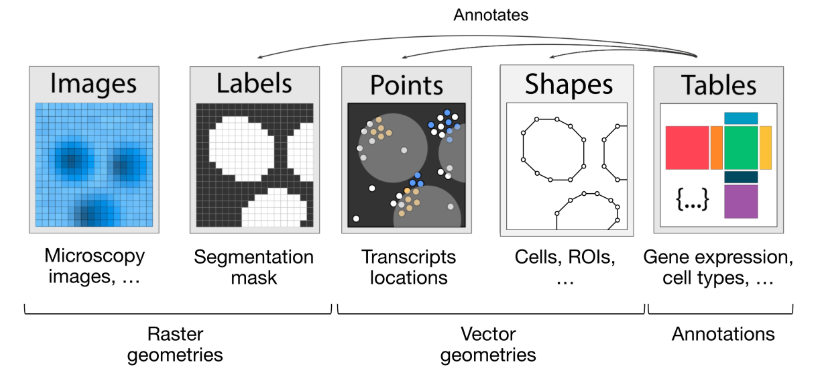

## Visium

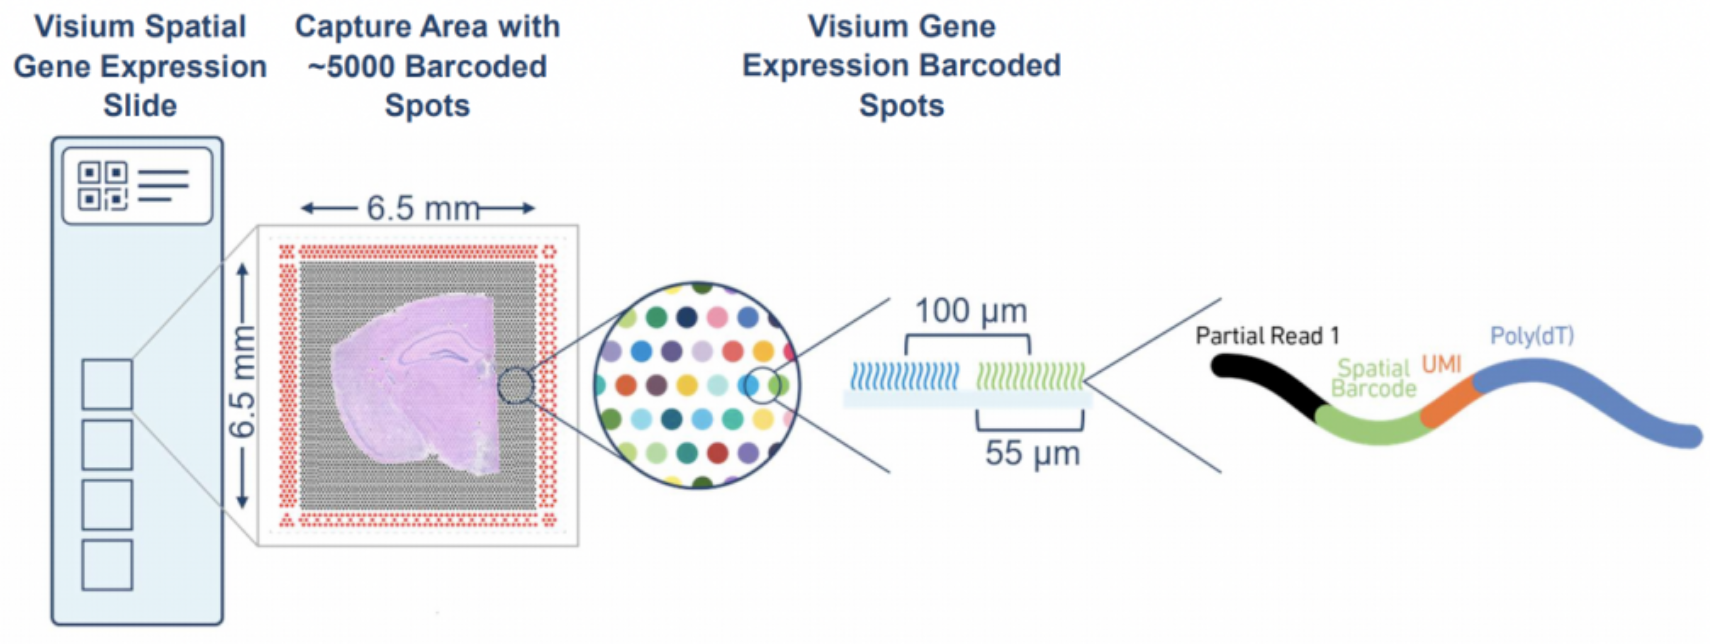

The Visium technology works by detecting transcripts in specific circular caption locations (often referred to as "Visium spots") on a slide. The circular capture locations are defined by the Shapes slot, which contains their coordinates. The Tables slot contains the actual transcript counts for each capture location. We can use the render_shapes function to overlay these circular locations onto our image.

In [45]:
import os

# Define the folder path you want to create
folder_path = "./data/visium_2.1.0_2_io_subset/"

# Create the folder path
try:
    os.makedirs(folder_path, exist_ok=True)
    print(f"Folder path '{folder_path}' created successfully.")
except Exception as e:
    print(f"An error occurred while creating the folder path: {e}")

Folder path './data/visium_2.1.0_2_io_subset/' created successfully.


In [ ]:
# This is a way to download any dataset you like from 10x!
!wget -O ./data/visium_2.1.0_2_io_subset/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_filtered_feature_bc_matrix.h5 "https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_filtered_feature_bc_matrix.h5"
!wget -O ./data/visium_2.1.0_2_io_subset/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_spatial.tar.gz "https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_spatial.tar.gz"

In [4]:
import tarfile
import os

# Define the file paths
tar_file_path = "./data/visium_2.1.0_2_io_subset/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_spatial.tar.gz"
extract_path = "./data/visium_2.1.0_2_io_subset/"

# Extract the tar.gz file
try:
    with tarfile.open(tar_file_path, "r:gz") as tar:
        tar.extractall(path=extract_path)
    print(f"Extracted files to: {extract_path}")
    print("Contents:", os.listdir(extract_path))
except Exception as e:
    print(f"An error occurred while extracting the file: {e}")

Extracted files to: ./data/visium_2.1.0_2_io_subset/
Contents: ['CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_filtered_feature_bc_matrix.h5', 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_spatial.tar.gz', 'spatial']


### Quiz: Understanding data format
1. What data components enable the assembly of spatial_visium objects?

Can you guess the component that belongs to each description? Run the code chunks below.

<div style="border: 1px solid #ffa6a6; padding: 10px; border-radius: 5px;">
<span style="color: #ff6666; font-size: 20px;"><b>Quiz:</b></span> <span style="font-size: 20px;">Understanding Data Format</span>  
<ul>
    <li>What data components enable the assembly of <b>spatial_visium</b> objects?</li>
    <li>Can you guess the component that belongs to each description?</li>
</ul>
<p>Run the code chunks below to explore:</p>
<ol>
    <li>Which file provides the spatial coordinates of transcriptomics spots?</li>
    <li>What component contains the scaled low-resolution tissue image?</li>
    <li>How are barcodes mapped to their physical positions on the tissue?</li>
</ol>
</div>

This component contains markers used to align the spatial tissue image with the slide. 
These are essential for accurately mapping tissue spots to their physical locations.

In [3]:
from IPython.display import display, HTML

# Define the reflection question with green styling
reflection_question = """
<div style="border: 1px solid #90ee90; padding: 10px; border-radius: 5px;">
<span style="color: #32cd32; font-size: 16px;"><b>This component contains markers used to align the spatial tissue image with the slide. 
These are essential for accurately mapping tissue spots to their physical locations</b></span>
</div>
"""

# Define the hidden answer with collapsible content
hidden_answer = """
<details>
<summary>Click to reveal answer</summary>
<p>
aligned_fiducials
</p>
</details>
"""

# Display the reflection question with hidden answer
display(HTML(reflection_question + hidden_answer))

In [5]:
from IPython.display import display, HTML

# Define the reflection question with green styling
reflection_question = """
<div style="border: 1px solid #90ee90; padding: 10px; border-radius: 5px;">
<span style="color: #32cd32; font-size: 16px;"><b>This component represents the aligned image of the tissue, 
processed to ensure correct orientation and registration with the spatial transcriptomics spots on the slide.</b></span>
</div>
"""

# Define the hidden answer with collapsible content
hidden_answer = """
<details>
<summary>Click to reveal answer</summary>
<p>
aligned_tissue_image.jpg
</p>
</details>
"""

# Display the reflection question with hidden answer
display(HTML(reflection_question + hidden_answer))

In [6]:
from IPython.display import display, HTML

# Define the reflection question with green styling
reflection_question = """
<div style="border: 1px solid #90ee90; padding: 10px; border-radius: 5px;">
<span style="color: #32cd32; font-size: 16px;"><b>This component provides scaling factors that map between the high-resolution tissue image 
and the low-resolution spot layout. It's crucial for visualizing and analyzing spatial data accurately.</b></span>
</div>
"""

# Define the hidden answer with collapsible content
hidden_answer = """
<details>
<summary>Click to reveal answer</summary>
<p>
scalefactors_json.json
</p>
</details>
"""

# Display the reflection question with hidden answer
display(HTML(reflection_question + hidden_answer))

In [7]:
from IPython.display import display, HTML

# Define the reflection question with green styling
reflection_question = """
<div style="border: 1px solid #90ee90; padding: 10px; border-radius: 5px;">
<span style="color: #32cd32; font-size: 16px;"><b>This component is a lower-resolution version of the tissue image, 
often used for overlaying spot data due to its faster processing.</b></span>
</div>
"""

# Define the hidden answer with collapsible content
hidden_answer = """
<details>
<summary>Click to reveal answer</summary>
<p>
tissue_lowres_image.png
</p>
</details>
"""

# Display the reflection question with hidden answer
display(HTML(reflection_question + hidden_answer))

In [8]:
from IPython.display import display, HTML

# Define the reflection question with green styling
reflection_question = """
<div style="border: 1px solid #90ee90; padding: 10px; border-radius: 5px;">
<span style="color: #32cd32; font-size: 16px;"><b>This component contains the coordinates of the spatial transcriptomics spots 
relative to the tissue image. It maps barcodes to their physical positions on the tissue, enabling spatial analysis.</b></span>
</div>
"""

# Define the hidden answer with collapsible content
hidden_answer = """
<details>
<summary>Click to reveal answer</summary>
<p>
tissue_positions.csv
</p>
</details>
"""

# Display the reflection question with hidden answer
display(HTML(reflection_question + hidden_answer))

#### Inspecting Visium data structure

In [18]:
sdata_visium = visium(data_path + "visium_2.1.0_2_io_subset")

INFO     reading                                                                                                   
         data/visium_2.1.0_2_io_subset/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_filtered_feature_bc_mat
         rix.h5                                                                                                    


/Users/georgegavriilidis/spatialdata_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/georgegavriilidis/spatialdata_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/georgegavriilidis/spatialdata_env/lib/python3.9/site-packages/spatialdata/models/models.py:1035: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)


The warning above indicates that the variable names (in this case, genes) in the provided data are not unique. It is essential that the variable names are unique to ensure the accuracy of several analysis steps, so we'll use the `AnnData` API to make sure of that.

In [19]:
sdata_visium.tables["table"].var_names_make_unique()  # modifies in-place

Let's have a look at the `SpatialData` object we just created:

In [20]:
sdata_visium

SpatialData object
├── Images
│     ├── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image': DataArray[cyx] (3, 2000, 1744)
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image': DataArray[cyx] (3, 600, 523)
├── Shapes
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma': GeoDataFrame shape: (5756, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (5756, 18085)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)
    ▸ 'downscaled_lowres', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)
    ▸ 'global', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)

In [21]:
sdata_visium["table"]

AnnData object with n_obs × n_vars = 5756 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'spatialdata_attrs'
    obsm: 'spatial'

We use the following classes for storing the elements:

* single-scale images and labels elements are represented as xarray.DataArray
objects.
* shapes elements are represented as geopandas.GeoDataFrame objects.
* tables elements are represented as anndata.AnnData objects.

In [22]:
image = sdata_visium["CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image"]
image

<xarray.DataArray 'image' (c: 3, y: 600, x: 523)> Size: 941kB
dask.array<transpose, shape=(3, 600, 523), dtype=uint8, chunksize=(3, 600, 523), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) <U1 12B 'r' 'g' 'b'
  * y        (y) float64 5kB 0.5 1.5 2.5 3.5 4.5 ... 596.5 597.5 598.5 599.5
  * x        (x) float64 4kB 0.5 1.5 2.5 3.5 4.5 ... 519.5 520.5 521.5 522.5
Attributes:
    transform:  {'downscaled_lowres': Identity }

This is a low-resolution tissue image represented as an xarray.DataArray, with labeled dimensions (RGB channels, height, and width) and metadata for spatial alignment. This structure is crucial for integrating the image with spatial transcriptomics data and performing visual or computational analyses on tissue sections.

In [23]:
image2 = sdata_visium["CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image"]
image2

<xarray.DataArray 'image' (c: 3, y: 2000, x: 1744)> Size: 10MB
dask.array<transpose, shape=(3, 2000, 1744), dtype=uint8, chunksize=(3, 2000, 1744), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) <U1 12B 'r' 'g' 'b'
  * y        (y) float64 16kB 0.5 1.5 2.5 3.5 ... 1.998e+03 1.998e+03 2e+03
  * x        (x) float64 14kB 0.5 1.5 2.5 3.5 ... 1.742e+03 1.742e+03 1.744e+03
Attributes:
    transform:  {'downscaled_hires': Identity }

In [ ]:
gdf = sdata_visium["CytAssist_FFPE_Protein_Expression_Human_Glioblastoma"]
gdf

<div style="border: 1px solid #ffa6a6; padding: 10px; border-radius: 5px;">
<span style="color: #ff6666; font-size: 20px;"><b>Reflection Point:</b></span> <span style="font-size: 20px;">Why Utilize GeoPandas?</span>  
<ul>
    <li>How does GeoPandas enhance spatial data analysis?</li>
    <li>What advantages does it offer in handling geospatial data compared to standard pandas?</li>
    <li>Consider its integration with other spatial libraries for advanced visualization and analysis.</li>
</ul>
<p>Reflect on the following:</p>
<ol>
    <li>What specific features of GeoPandas are most relevant to your dataset?</li>
    <li>How might GeoPandas streamline tasks like mapping coordinates or analyzing spatial relationships?</li>
    <li>What additional tools or libraries could complement GeoPandas in your workflow?</li>
</ol>
</div>

In [10]:
from IPython.display import display, HTML

# Define the reflection question with green styling
reflection_question = """
<div style="border: 1px solid #90ee90; padding: 10px; border-radius: 5px;">
<span style="color: #32cd32; font-size: 16px;"><b>Geopandas in SpatialData:</b></span>
</div>
"""

# Define the hidden answer with collapsible content
hidden_answer = """
<details>
<summary>Click to reveal the answer</summary>
<p>
Spatial Coordinates and Spot Radius: The geometry column contains the spatial positions of transcriptomic spots on the tissue, while the radius defines the size of each circular spot, enabling accurate visualization and mapping.

Integration with Gene Expression: The geospatial data links each spot to its corresponding gene expression profile, facilitating spatially resolved analysis of molecular data across the tissue.

Applications in Spatial Analysis: Geospatial relationships, such as clustering and distance between spots, can reveal tissue heterogeneity, cellular localization, and interactions within the tissue microenvironment.
</p>
</details>
"""

# Display the reflection question with hidden answer
display(HTML(reflection_question + hidden_answer))

### Visium HD

Visium HD is a next-generation spatial transcriptomics platform offering single-cell-scale resolution of whole transcriptome gene expression. With advanced slide architecture and a CytAssist-enabled workflow, it provides high-resolution spatial insights into tissue organization and cellular interactions. Applications include identifying rare cell types, such as IgA plasma cells in human trachea, and discovering biomarkers like B-cell activity in liver tumors during clinical trials.

The platform’s 2 µm x 2 µm barcoded oligonucleotide squares enable precise spatial mapping of gene expression, with customizable binning options for various resolutions. Tissue sections, including archived FFPE samples, undergo H&E or IF staining, followed by transcriptome-wide probe capture and spatial barcoding. These captured probes are processed into gene expression libraries for sequencing and visualization.

Visium HD empowers researchers to uncover tissue organization, identify disease biomarkers, and generate actionable insights for immunology and oncology. Its high-resolution data represents a leap forward in spatial biology, enabling discoveries that were previously unattainable.

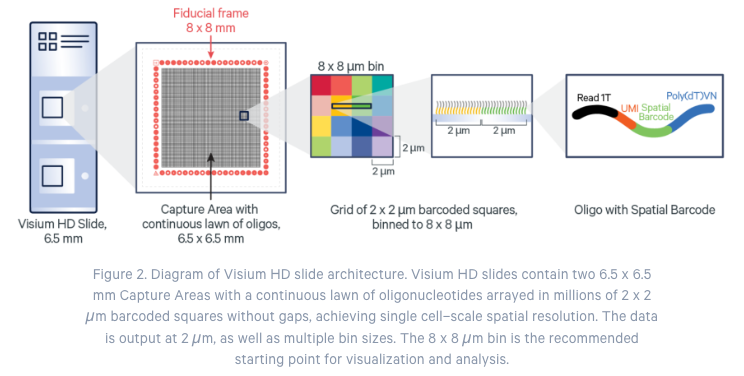

This technology is somewhat similar to the regular Visium technology, but the spatial expression is no longer based on an hexagonal grid but instead on probes, arranged into a square grid, which can be aggregated into different resolutions. This allows the data to have sub-cellular precision. More details can be found in the publication.

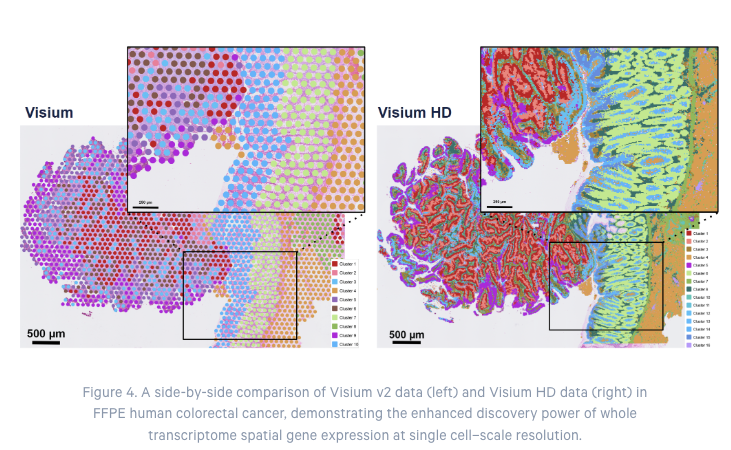

In [25]:
# import os

# # Define the folder path you want to create
# folder_path = "./data/visium_hd_3.0.0_io_subset/"

# # Create the folder path
# try:
#     os.makedirs(folder_path, exist_ok=True)
#     print(f"Folder path '{folder_path}' created successfully.")
# except Exception as e:
#     print(f"An error occurred while creating the folder path: {e}")

Folder path './data/visium_hd_3.0.0_io_subset/' created successfully.


In [ ]:
# !wget -O ./data/visium_hd_3.0.0_io_subset/Visium_HD_Mouse_Small_Intestine_feature_slice.h5 https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Mouse_Small_Intestine/Visium_HD_Mouse_Small_Intestine_feature_slice.h5

# !wget -O ./data/visium_hd_3.0.0_io_subset/Visium_HD_Mouse_Small_Intestine_molecule_info.h5 https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Mouse_Small_Intestine/Visium_HD_Mouse_Small_Intestine_molecule_info.h5

# !wget -O ./data/visium_hd_3.0.0_io_subset/Visium_HD_Mouse_Small_Intestine_spatial.tar.gz https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Mouse_Small_Intestine/Visium_HD_Mouse_Small_Intestine_spatial.tar.gz


In [ ]:
# !wget -O ./data/visium_hd_3.0.0_io_subset/Visium_HD_Mouse_Small_Intestine_binned_outputs.tar.gz https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Mouse_Small_Intestine/Visium_HD_Mouse_Small_Intestine_binned_outputs.tar.gz

In [ ]:
# # Unzip spatial folder
# import tarfile
# import os

# # Define the file paths
# tar_file_path = "./data/visium_hd_3.0.0_io_subset/Visium_HD_Mouse_Small_Intestine_spatial.tar.gz"
# extract_path = "./data/visium_hd_3.0.0_io_subset/"

# # Extract the tar.gz file
# try:
#     with tarfile.open(tar_file_path, "r:gz") as tar:
#         tar.extractall(path=extract_path)
#     print(f"Extracted files to: {extract_path}")
#     print("Contents:", os.listdir(extract_path))
# except Exception as e:
#     print(f"An error occurred while extracting the file: {e}")

In [ ]:
# # Unzip binned outputs
# import tarfile
# import os

# # Define the file paths
# tar_file_path = "./data/visium_hd_3.0.0_io_subset/Visium_HD_Mouse_Small_Intestine_binned_outputs.tar.gz"
# extract_path = "./data/visium_hd_3.0.0_io_subset/"

# # Extract the tar.gz file
# try:
#     with tarfile.open(tar_file_path, "r:gz") as tar:
#         tar.extractall(path=extract_path)
#     print(f"Extracted files to: {extract_path}")
#     print("Contents:", os.listdir(extract_path))
# except Exception as e:
#     print(f"An error occurred while extracting the file: {e}")

* Dataset Structure: The Visium HD dataset includes high-resolution (hires_image) and low-resolution (lowres_image) tissue images, as well as shapes at varying spatial resolutions (square_002um, square_008um, square_016um) to accommodate ultra-high-density data.

* Coordinate Systems: Multiple coordinate systems (downscaled_hires, downscaled_lowres, global) align the spatial data with tissue images, enabling precise mapping and cross-resolution analysis.

* Binned Spatial Resolutions: Shapes at different resolutions (e.g., square_002um for fine-grained analysis and square_016um for aggregated data) provide flexibility in balancing spatial resolution and computational efficiency.

Similarly, to the regular Visium data, we can read and inspect the individual modalities contained in the data. We can see that the Visium HD data contains a lot more elements in the Shapes slot (351817 vs 5756) due to the increased precision.

In [30]:
sdata_visium_hd = visium_hd("./data/visium_hd_3.0.0_io_subset")

sdata_visium_hd

/Users/georgegavriilidis/spatialdata_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/georgegavriilidis/spatialdata_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/georgegavriilidis/spatialdata_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/var/folders/hr/f3msc_bs3z53n3_m4c4ry6tc0000gn/T/ipykernel_6753/2805627724.py:1: UserWarning: No full resolution image found. If incorrect, please specify the path in the `fullres_image_file` parameter when calling the `visium_hd` reader function.
  sdata_visium_hd = visium_hd("./data/visium_hd_3.0.0

SpatialData object
├── Images
│     ├── 'Visium_HD_Mouse_Small_Intestine_hires_image': DataArray[cyx] (3, 5575, 6000)
│     └── 'Visium_HD_Mouse_Small_Intestine_lowres_image': DataArray[cyx] (3, 558, 600)
├── Shapes
│     ├── 'Visium_HD_Mouse_Small_Intestine_square_002um': GeoDataFrame shape: (5479660, 1) (2D shapes)
│     ├── 'Visium_HD_Mouse_Small_Intestine_square_008um': GeoDataFrame shape: (351817, 1) (2D shapes)
│     └── 'Visium_HD_Mouse_Small_Intestine_square_016um': GeoDataFrame shape: (91033, 1) (2D shapes)
└── Tables
      ├── 'square_002um': AnnData (5479660, 19059)
      ├── 'square_008um': AnnData (351817, 19059)
      └── 'square_016um': AnnData (91033, 19059)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        Visium_HD_Mouse_Small_Intestine_hires_image (Images), Visium_HD_Mouse_Small_Intestine_square_002um (Shapes), Visium_HD_Mouse_Small_Intestine_square_008um (Shapes), Visium_HD_Mouse_Small_Intestine_square_016um (Shapes)
    ▸ 'downscaled_lowres'

In [31]:
sdata_visium_hd.tables["square_008um"].var_names_make_unique()  # modifies in-place

### Reflection Point:
- Differences between Visium and Visium HD?

In [32]:
# Key differences between Visium and Visium HD
answer = """
### Reflection Point: What are the key differences between Visium and Visium HD?

- **Resolution**:
  - Visium HD provides much higher resolution with multiple spatial scales (e.g., `002um`, `008um`, `016um`), while Visium has a single spatial resolution.
  
- **Data Density**:
  - Visium HD: Millions of spatial features (e.g., `5479660` at `002um`), supporting ultra-detailed analyses.
  - Visium: Fewer spatial features (e.g., `5756` spots), suitable for broader but less detailed studies.

- **Images**:
  - Visium HD: Higher pixel density (e.g., `5575 x 6000` for high-res images).
  - Visium: Smaller images with lower resolution (e.g., `2000 x 1744` for high-res images).

- **Scalability**:
  - Visium HD supports multi-scale analyses, making it ideal for detailed exploration and advanced tissue-specific studies.
  - Visium is optimized for standard workflows with moderate resolution and computational needs.

- **Coordinate Systems**:
  - Visium HD includes multiple coordinate systems (`downscaled_hires`, `downscaled_lowres`, `global`) for flexibility.
  - Visium has fewer coordinate systems, simplifying analysis.

- **Applications**:
  - Visium HD: Ideal for small, complex tissue regions requiring ultra-high resolution.
  - Visium: Suited for larger tissue samples or routine analyses.
"""

# Print the answer
print(answer)



### Reflection Point: What are the key differences between Visium and Visium HD?

- **Resolution**:
  - Visium HD provides much higher resolution with multiple spatial scales (e.g., `002um`, `008um`, `016um`), while Visium has a single spatial resolution.
  
- **Data Density**:
  - Visium HD: Millions of spatial features (e.g., `5479660` at `002um`), supporting ultra-detailed analyses.
  - Visium: Fewer spatial features (e.g., `5756` spots), suitable for broader but less detailed studies.

- **Images**:
  - Visium HD: Higher pixel density (e.g., `5575 x 6000` for high-res images).
  - Visium: Smaller images with lower resolution (e.g., `2000 x 1744` for high-res images).

- **Scalability**:
  - Visium HD supports multi-scale analyses, making it ideal for detailed exploration and advanced tissue-specific studies.
  - Visium is optimized for standard workflows with moderate resolution and computational needs.

- **Coordinate Systems**:
  - Visium HD includes multiple coordinate systems 

## Xenium

In [54]:
# import os

# # Define the folder path relative to your current directory (PWD)
# folder_path = "./data/xenium_lung_io_subset/"

# # Create the folder path
# try:
#     os.makedirs(folder_path, exist_ok=True)
#     print(f"Folder path '{folder_path}' created successfully.")
# except Exception as e:
#     print(f"An error occurred while creating the folder path: {e}")

Folder path './data/xenium_lung_io_subset/' created successfully.


In [ ]:
# # Download the Xenium human lung cancer FFPE data
# !wget -O ./data/xenium_lung_io_subset/Xenium_V1_humanLung_Cancer_FFPE_outs.zip "https://cf.10xgenomics.com/samples/xenium/2.0.0/Xenium_V1_humanLung_Cancer_FFPE/Xenium_V1_humanLung_Cancer_FFPE_outs.zip"

In [ ]:
# !unzip ./data/xenium_lung_io_subset/Xenium_V1_humanLung_Cancer_FFPE_outs.zip -d ./data/xenium_lung_io_subset/

In [60]:
!ls ./data/xenium_lung_io_subset

Xenium_V1_humanLung_Cancer_FFPE_outs.zip
analysis.tar.gz
analysis.zarr.zip
analysis_summary.html
aux_outputs.tar.gz
cell_boundaries.csv.gz
cell_boundaries.parquet
cell_feature_matrix.h5
cell_feature_matrix.tar.gz
cell_feature_matrix.zarr.zip
cells.csv.gz
cells.parquet
cells.zarr.zip
experiment.xenium
gene_panel.json
metrics_summary.csv
morphology.ome.tif
morphology_focus
nucleus_boundaries.csv.gz
nucleus_boundaries.parquet
transcripts.csv.gz
transcripts.parquet
transcripts.zarr.zip


In [61]:
sdata_xenium = xenium("./data/xenium_lung_io_subset", cells_as_circles=True)

sdata_xenium

INFO     reading data/xenium_lung_io_subset/cell_feature_matrix.h5                                                 


SpatialData object
├── Images
│     └── 'morphology_focus': DataTree[cyx] (5, 17098, 51187), (5, 8549, 25593), (5, 4274, 12796), (5, 2137, 6398), (5, 1068, 3199)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (17098, 51187), (8549, 25593), (4274, 12796), (2137, 6398), (1068, 3199)
│     └── 'nucleus_labels': DataTree[yx] (17098, 51187), (8549, 25593), (4274, 12796), (2137, 6398), (1068, 3199)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 11) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (162254, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (162254, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (156628, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (162254, 377)
with coordinate systems:
    ▸ 'global', with elements:
        morphology_focus (Images), cell_labels (Labels), nucleus_labels (Labels), transcripts (Points), cell_boundaries (Shapes), cell_circles (Shapes), nucleus_boundaries (Shape

![Alt Text](xenium.png)

<div style="border: 1px solid #ffa6a6; padding: 10px; border-radius: 5px;">
<span style="color: #ff6666; font-size: 20px;"><b>Reflection Point:</b></span> <span style="font-size: 20px;">Differences Between Xenium, Visium, and Visium HD</span>  
<ul>
    <li>What are the primary differences in resolution, multi-modal capabilities, and scalability?</li>
    <li>How do these differences impact the choice of technology for specific applications?</li>
    <li>Consider how each technology aligns with your research goals and data requirements.</li>
</ul>
<p>Reflect on the following:</p>
<ol>
    <li>Which technology would you use for ultra-high resolution, subcellular analysis?</li>
    <li>What are the trade-offs between higher resolution and broader spatial coverage?</li>
    <li>How does integration with multi-modal data influence your decision?</li>
</ol>
</div>

In [11]:
from IPython.display import display, HTML

# Define the reflection question with green styling
reflection_question = """
<div style="border: 1px solid #90ee90; padding: 10px; border-radius: 5px;">
<span style="color: #32cd32; font-size: 16px;"><b>Highlighting the Advantages of Xenium:</b></span>
</div>
"""

# Define the hidden answer with collapsible content
hidden_answer = """
<details>
<summary>Click to reveal the answer</summary>
<p>
### Advantages of Xenium
<ul>
    <li><b>Multi-Modal Capabilities:</b> Combines diverse data types: 3D transcripts, cell labels, nucleus labels, boundaries, and expression data.</li>
    <li><b>Ultra-High Resolution:</b> Captures extremely detailed data with high-resolution images (e.g., 17098 x 51187 pixels) and multiple scales.</li>
    <li><b>Comprehensive Cellular Analysis:</b> Provides cell and nucleus boundaries, labels, and spatial transcriptomics, enabling detailed studies at subcellular levels.</li>
    <li><b>Scalability:</b> Suitable for large and complex datasets with rich annotations and detailed morphology data.</li>
    <li><b>Global Integration:</b> Aligns multiple data types (e.g., images, labels, transcripts, and shapes) into a unified coordinate system.</li>
</ul>
</p>
</details>
"""

# Display the reflection question with hidden answer
display(HTML(reflection_question + hidden_answer))

## Exploring the core slots of a `SpatialData` object

MERFISH (Multiplexed Error-Robust Fluorescence In Situ Hybridization) is a spatial transcriptomics technique that allows for the highly multiplexed, spatially resolved measurement of RNA molecules in single cells within their native tissue context. 

![Alt Text](merfish.png)

In [32]:
merfish_zarr_path = "./merfish.zarr"

In [37]:
sdata_merfish = sd.read_zarr(merfish_zarr_path)
sdata_merfish

SpatialData object, with associated Zarr store: /Users/georgegavriilidis/Downloads/merfish.zarr
├── Images
│     └── 'rasterized': DataArray[cyx] (1, 522, 575)
├── Points
│     └── 'single_molecule': DataFrame with shape: (<Delayed>, 3) (2D points)
├── Shapes
│     ├── 'anatomical': GeoDataFrame shape: (6, 1) (2D shapes)
│     └── 'cells': GeoDataFrame shape: (2389, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (2389, 268)
with coordinate systems:
    ▸ 'global', with elements:
        rasterized (Images), single_molecule (Points), anatomical (Shapes), cells (Shapes)

A `SpatialData` object is a container for images, labels, shapes, points and tables. Each of this object is denoted with the term *element*. We will use this term often.

For instance, we will use the term "Shapes element" to denote a geometric object (as we will see below, a dataframe) containing all the cells for a sample. We will **not** use the term "shapes element" to denote a single cell (a single cell will be a single row in our geometric dataframe).

To access an element:

In [38]:
sdata_merfish["table"]

AnnData object with n_obs × n_vars = 2389 × 268
    obs: 'cell_id', 'region'
    uns: 'spatialdata_attrs'

### Reflection Point:
- What does MERFISH bring to the field of spatial?
- What is zarr?

In [38]:
# Highlighting the advantages of MERFISH
advantages = """
### Advantages of MERFISH

- **High-Throughput Spatial Transcriptomics**:
  - Captures spatial localization of thousands of RNA molecules in a single experiment.

- **Single-Molecule Resolution**:
  - Provides `single_molecule` data points for 2D spatial coordinates, enabling detailed analysis of individual RNA molecules.

- **Anatomical Context**:
  - Includes `anatomical` shapes for structural insights, allowing integration of spatial data with tissue morphology.

- **Cellular Data Integration**:
  - `cells` shapes and corresponding expression data (2389 cells, 268 genes) provide a balance between resolution and dataset size.

- **Rasterized Images**:
  - Includes a rasterized image layer, enabling visual alignment and quality control of spatial data.

- **Global Coordinate System**:
  - Unifies multiple modalities (images, points, shapes, and tables) under a `global` coordinate system for seamless integration.

- **Efficient Storage**:
  - Data is stored in a Zarr store, optimized for scalability and fast access.
"""

print(advantages)



### Advantages of MERFISH

- **High-Throughput Spatial Transcriptomics**:
  - Captures spatial localization of thousands of RNA molecules in a single experiment.

- **Single-Molecule Resolution**:
  - Provides `single_molecule` data points for 2D spatial coordinates, enabling detailed analysis of individual RNA molecules.

- **Anatomical Context**:
  - Includes `anatomical` shapes for structural insights, allowing integration of spatial data with tissue morphology.

- **Cellular Data Integration**:
  - `cells` shapes and corresponding expression data (2389 cells, 268 genes) provide a balance between resolution and dataset size.

- **Rasterized Images**:
  - Includes a rasterized image layer, enabling visual alignment and quality control of spatial data.

- **Global Coordinate System**:
  - Unifies multiple modalities (images, points, shapes, and tables) under a `global` coordinate system for seamless integration.

- **Efficient Storage**:
  - Data is stored in a Zarr store, optimized 

## Deep dive in `spatialdata` data architecture

The `spatialdata` library does not introduce specific types for storing the elements, and rather adopts standard classes from the imaging and geospatial Python community.

We use the following classes for storing the elements:
- single-scale images and labels elements are represented as [`xarray.DataArray`](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html) objects.
- multi-scale images and labels elements are represented as [`datatree.DataTree`](https://xarray-datatree.readthedocs.io/en/latest/quick-overview.html#datatrees) objects.
- shapes elements are represented as [`geopandas.GeoDataFrame`](https://geopandas.org/en/stable/docs/user_guide/data_structures.html) objects.
- points elements are represented as a lazy version of a [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) object; i.e. as [`dask.DataFrame`](https://docs.dask.org/en/stable/dataframe.html) objects.
- tables elements are represented as [`anndata.AnnData`](https://anndata.readthedocs.io/en/latest/) objects.

In particular:
- 2D/3D (cyx/czyx) multi-channel single-scale/multi-scale *images* (e.g. large H&E images)
- 2D/3D (yx/zyx) single-scale/multi-scale *labels* (e.g. segmentation masks)
- 2D/3D (xy/xyz) *points* (e.g. transcripts locations with gene id information)
- 2D (xy) *shapes* (e.g. cell/nucleus boundaries, anatomical annotatoins)
- *tables* (sparse/dense matrices/dataframes annotating the data).

We will give a quick overview of these classes here below; please refer to the respective documentations for a deeper introduction.

In the following examples *we will not manipulate or plot the elements using `spatialdata` code; we will just use standard `geospatial` libraries. This is to exemplify and remark how the data types we use are interoperable. Later we will show how `spatialdata` adds a layer of convenience on top of the existing geospatial ecosystem, by providing APIs that are implemented under the hood for all the geometric types.

### The `xarray.DataArray` class (*images* and *labels*)

Let's access the `"rasterized"` image from the MERFISH dataset.

In [39]:
image = sdata_merfish["rasterized"]
image

<xarray.DataArray 'image' (c: 1, y: 522, x: 575)> Size: 300kB
dask.array<from-zarr, shape=(1, 522, 575), dtype=uint8, chunksize=(1, 522, 575), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) int64 8B 0
  * y        (y) float64 4kB 0.5 1.5 2.5 3.5 4.5 ... 518.5 519.5 520.5 521.5
  * x        (x) float64 5kB 0.5 1.5 2.5 3.5 4.5 ... 571.5 572.5 573.5 574.5
Attributes:
    transform:  {'global': Sequence \n    Scale (c, y, x)\n        [1.       ...

As you can see, the object is a regular [`xarray.DataArray`](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html) object, a standard data structure in geospatial analysis. Therefore you can operate on the object with standard APIs or common external libraries (such as [`xarray-spatial`](https://github.com/makepath/xarray-spatial_).

For example:

In [40]:
import numpy as np

log_image = np.log1p(image)

In [41]:
log_image

<xarray.DataArray 'image' (c: 1, y: 522, x: 575)> Size: 600kB
dask.array<log1p, shape=(1, 522, 575), dtype=float16, chunksize=(1, 522, 575), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) int64 8B 0
  * y        (y) float64 4kB 0.5 1.5 2.5 3.5 4.5 ... 518.5 519.5 520.5 521.5
  * x        (x) float64 5kB 0.5 1.5 2.5 3.5 4.5 ... 571.5 572.5 573.5 574.5
Attributes:
    transform:  {'global': Sequence \n    Scale (c, y, x)\n        [1.       ...

Here we assign the new image in a new slot in the `SpatialData` object.

In [42]:
sdata_merfish["log_image"] = log_image

As said, the image is a regular `xarray.DataArray` object, so we can for instance plot it using standard APIs.

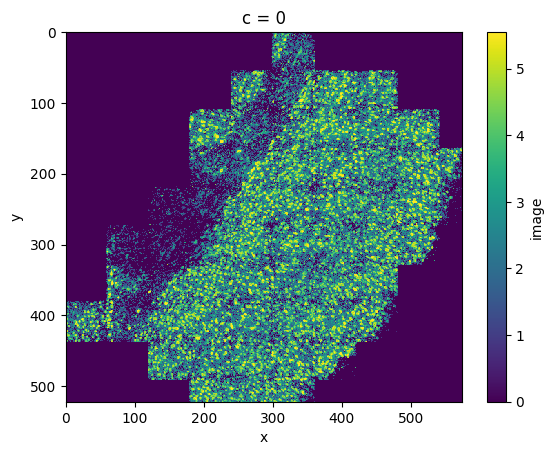

In [43]:
import matplotlib.pyplot as plt

plt.figure()
ax = plt.gca()
log_image.plot(ax=ax)
ax.invert_yaxis()
plt.show()

### The `datatree.DataTree` class (multiscale *images* and *labels*)

Multiscale images and labels are represented using the [`datatree.DataTree` class](https://xarray-datatree.readthedocs.io/en/latest/quick-overview.html#datatrees).

We will use the Xenium dataset since the MERFISH ones does not contain any multiscale image.

In [62]:
sdata_xenium

SpatialData object
├── Images
│     └── 'morphology_focus': DataTree[cyx] (5, 17098, 51187), (5, 8549, 25593), (5, 4274, 12796), (5, 2137, 6398), (5, 1068, 3199)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (17098, 51187), (8549, 25593), (4274, 12796), (2137, 6398), (1068, 3199)
│     └── 'nucleus_labels': DataTree[yx] (17098, 51187), (8549, 25593), (4274, 12796), (2137, 6398), (1068, 3199)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 11) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (162254, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (162254, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (156628, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (162254, 377)
with coordinate systems:
    ▸ 'global', with elements:
        morphology_focus (Images), cell_labels (Labels), nucleus_labels (Labels), transcripts (Points), cell_boundaries (Shapes), cell_circles (Shapes), nucleus_boundaries (Shape

Let's load a labels object instead of an image. Images always have a channel `c`, labels never. What we will discuss for labels applies exaclty to images.

In [63]:
multiscale_labels = sdata_xenium["cell_labels"]
multiscale_labels

DataTree('None', parent=None)
├── DataTree('scale0')
│       Dimensions:  (y: 17098, x: 51187)
│       Coordinates:
│         * y        (y) float64 137kB 0.5 1.5 2.5 3.5 ... 1.71e+04 1.71e+04 1.71e+04
│         * x        (x) float64 409kB 0.5 1.5 2.5 3.5 ... 5.118e+04 5.119e+04 5.119e+04
│       Data variables:
│           image    (y, x) uint32 4GB dask.array<chunksize=(4096, 4096), meta=np.ndarray>
├── DataTree('scale1')
│       Dimensions:  (y: 8549, x: 25593)
│       Coordinates:
│         * y        (y) float64 68kB 1.0 3.0 5.0 7.0 ... 1.709e+04 1.71e+04 1.71e+04
│         * x        (x) float64 205kB 1.0 3.0 5.0 7.0 ... 5.118e+04 5.118e+04 5.119e+04
│       Data variables:
│           image    (y, x) uint32 875MB dask.array<chunksize=(4096, 4096), meta=np.ndarray>
├── DataTree('scale2')
│       Dimensions:  (y: 4274, x: 12796)
│       Coordinates:
│         * y        (y) float64 34kB 2.0 6.001 10.0 ... 1.709e+04 1.709e+04 1.71e+04
│         * x        (x) float64 102kB 2.0 6.0 10.0 ... 5.118e+04 5.118e+04 5.118e+04
│       Data variables:
│           image    (y, x) uint32 219MB dask.array<chunksize=(4096, 4096), meta=np.ndarray>
├── DataTree('scale3')
│       Dimensions:  (y: 2137, x: 6398)
│       Coordinates:
│         * y        (y) float64 17kB 4.0 12.0 20.0 ... 1.708e+04 1.709e+04 1.709e+04
│         * x        (x) float64 51kB 4.0 12.0 20.0 ... 5.117e+04 5.117e+04 5.118e+04
│       Data variables:
│           image    (y, x) uint32 55MB dask.array<chunksize=(2137, 4096), meta=np.ndarray>
└── DataTree('scale4')
        Dimensions:  (y: 1068, x: 3199)
        Coordinates:
          * y        (y) float64 9kB 8.005 24.01 40.02 ... 1.706e+04 1.707e+04 1.709e+04
          * x        (x) float64 26kB 8.0 24.0 40.0 ... 5.115e+04 5.116e+04 5.118e+04
        Data variables:
            image    (y, x) uint32 14MB dask.array<chunksize=(1068, 3199), meta=np.ndarray>

The data tree has 5 groups, one for each scale of the multiscale labels. Each scale is a leaf of the tree (i.e. the tree doesn't branch out again), also each scale could in principle contain multiple labels elements, but `spatialdata` requires for it to contain a single labels element. Let's show an example on how to access the various scales and how to manipulate the object.

In [64]:
# show the scales
list(multiscale_labels.keys())

['scale0', 'scale1', 'scale2', 'scale3', 'scale4']

In [65]:
# access the scale 1
multiscale_labels["scale1"]

DataTree('scale1', parent="None")
    Dimensions:  (y: 8549, x: 25593)
    Coordinates:
      * y        (y) float64 68kB 1.0 3.0 5.0 7.0 ... 1.709e+04 1.71e+04 1.71e+04
      * x        (x) float64 205kB 1.0 3.0 5.0 7.0 ... 5.118e+04 5.118e+04 5.119e+04
    Data variables:
        image    (y, x) uint32 875MB dask.array<chunksize=(4096, 4096), meta=np.ndarray>

In [66]:
# this group contains a single-labels (as expected), called 'image'
# let's access such object
multiscale_labels["scale1"]["image"]

<xarray.DataArray 'image' (y: 8549, x: 25593)> Size: 875MB
dask.array<xarray-<this-array>, shape=(8549, 25593), dtype=uint32, chunksize=(4096, 4096), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 68kB 1.0 3.0 5.0 7.0 ... 1.709e+04 1.71e+04 1.71e+04
  * x        (x) float64 205kB 1.0 3.0 5.0 7.0 ... 5.118e+04 5.118e+04 5.119e+04
Attributes:
    transform:  {'global': Sequence \n    Scale (y, x)\n        [2.         2...

Note how the labels is a `xarray.DataArray` object. So, as expected, a multiscale labels is a collection of single scale labels.

Note also how the labels dimension are `('y', 'x')`; as said labels do no contain the channel dimension.

Now here is an example of using the data tree APIs, to slice in one go all the labels in the data tree.

In [67]:
multiscale_labels.sel(x=slice(30, 100))

DataTree('None', parent=None)
├── DataTree('scale0')
│       Dimensions:  (y: 17098, x: 70)
│       Coordinates:
│         * y        (y) float64 137kB 0.5 1.5 2.5 3.5 ... 1.71e+04 1.71e+04 1.71e+04
│         * x        (x) float64 560B 30.5 31.5 32.5 33.5 34.5 ... 96.5 97.5 98.5 99.5
│       Data variables:
│           image    (y, x) uint32 5MB dask.array<chunksize=(4096, 70), meta=np.ndarray>
├── DataTree('scale1')
│       Dimensions:  (y: 8549, x: 35)
│       Coordinates:
│         * y        (y) float64 68kB 1.0 3.0 5.0 7.0 ... 1.709e+04 1.71e+04 1.71e+04
│         * x        (x) float64 280B 31.0 33.0 35.0 37.0 39.0 ... 93.0 95.0 97.0 99.0
│       Data variables:
│           image    (y, x) uint32 1MB dask.array<chunksize=(4096, 35), meta=np.ndarray>
├── DataTree('scale2')
│       Dimensions:  (y: 4274, x: 18)
│       Coordinates:
│         * y        (y) float64 34kB 2.0 6.001 10.0 ... 1.709e+04 1.709e+04 1.71e+04
│         * x        (x) float64 144B 30.0 34.0 38.0 42.0 ... 86.01 90.01 94.01 98.01
│       Data variables:
│           image    (y, x) uint32 308kB dask.array<chunksize=(4096, 18), meta=np.ndarray>
├── DataTree('scale3')
│       Dimensions:  (y: 2137, x: 8)
│       Coordinates:
│         * y        (y) float64 17kB 4.0 12.0 20.0 ... 1.708e+04 1.709e+04 1.709e+04
│         * x        (x) float64 64B 36.0 44.0 52.0 60.0 68.0 76.0 84.0 92.01
│       Data variables:
│           image    (y, x) uint32 68kB dask.array<chunksize=(2137, 8), meta=np.ndarray>
└── DataTree('scale4')
        Dimensions:  (y: 1068, x: 4)
        Coordinates:
          * y        (y) float64 9kB 8.005 24.01 40.02 ... 1.706e+04 1.707e+04 1.709e+04
          * x        (x) float64 32B 40.0 56.0 72.0 88.01
        Data variables:
            image    (y, x) uint32 17kB dask.array<chunksize=(1068, 4), meta=np.ndarray>

Finally, let's make a plot of a portion of a portion of the labels.

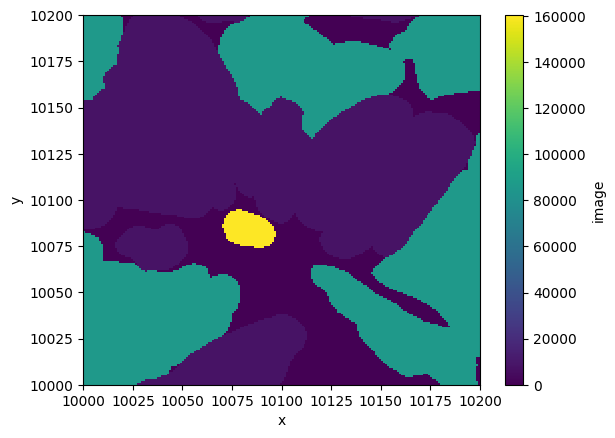

In [68]:
multiscale_labels["scale0"]["image"].sel(
    x=slice(10000, 10200), y=slice(10000, 10200)
).plot()

Note: the `spatialdata-plot` library gives more control when plotting the elements of `SpatialData` object. We will see more on this in a later tutorial.

### The `geopandas.GeoDataFrame` class (*shapes*)
A [`GeoDataFrame`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html) is an object that inherits from a `pandas.DataFrame`, and as such it supports the APIs that `pandas` provides, but also new powerful APIs for geometric manipulation.

In [69]:
gdf = sdata_xenium["cell_boundaries"]
gdf

geometry
aaaadpbp-1  POLYGON ((205.062 1489.838, 204.213 1490.475, ...
aaaaficg-1  POLYGON ((200.812 1811.988, 199.538 1812.625, ...
aaabbaka-1  POLYGON ((177.013 2158.575, 175.525 2159.425, ...
aaabbjoo-1  POLYGON ((185.513 2156.238, 184.238 2157.3, 18...
aaablchg-1  POLYGON ((197.2 2191.938, 197.413 2192.15, 197...
...                                                       ...
ojaaphhh-1  POLYGON ((4551.538 1640.925, 4551.325 1641.138...
ojabeldf-1  POLYGON ((4437.212 1627.75, 4437 1627.963, 443...
ojacfbid-1  POLYGON ((4462.712 1575.05, 4462.288 1575.475,...
ojacfhhg-1  POLYGON ((4619.962 1452.863, 4619.75 1453.075,...
ojacpeii-1  POLYGON ((4620.175 1526.388, 4619.75 1526.812,...

[162254 rows x 1 columns]

The `geometry` column is what contains the spatial information.

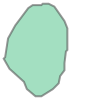

In [70]:
gdf.geometry.iloc[3]

In `spatialdata`, we support only dataframes where all the geometries are polygons/multipolygons, either where all the geometries are `shapely.Point` and a column called `radius` is present.

One can add new regular columns to the dataframe.

In [71]:
gdf["cell_area"] = gdf.area
gdf

geometry   cell_area
aaaadpbp-1  POLYGON ((205.062 1489.838, 204.213 1490.475, ...   65.273241
aaaaficg-1  POLYGON ((200.812 1811.988, 199.538 1812.625, ...   47.436672
aaabbaka-1  POLYGON ((177.013 2158.575, 175.525 2159.425, ...  115.961463
aaabbjoo-1  POLYGON ((185.513 2156.238, 184.238 2157.3, 18...   90.922142
aaablchg-1  POLYGON ((197.2 2191.938, 197.413 2192.15, 197...  116.932837
...                                                       ...         ...
ojaaphhh-1  POLYGON ((4551.538 1640.925, 4551.325 1641.138...   25.084211
ojabeldf-1  POLYGON ((4437.212 1627.75, 4437 1627.963, 443...    4.628853
ojacfbid-1  POLYGON ((4462.712 1575.05, 4462.288 1575.475,...    5.621909
ojacfhhg-1  POLYGON ((4619.962 1452.863, 4619.75 1453.075,...    6.141260
ojacpeii-1  POLYGON ((4620.175 1526.388, 4619.75 1526.812,...    5.757876

[162254 rows x 2 columns]

In [72]:
import geopandas
from shapely import Polygon

box = Polygon([(2000, 1000), (2500, 1000), (2500, 2000), (2000, 2000), (2000, 1000)])
box_gdf = geopandas.GeoDataFrame(geopandas.GeoSeries(box), columns=["geometry"])

intersection = geopandas.overlay(box_gdf, gdf, how="intersection")

/var/folders/hr/f3msc_bs3z53n3_m4c4ry6tc0000gn/T/ipykernel_6753/1748526972.py:7: UserWarning: `keep_geom_type=True` in overlay resulted in 2 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersection = geopandas.overlay(box_gdf, gdf, how="intersection")


<Axes: >

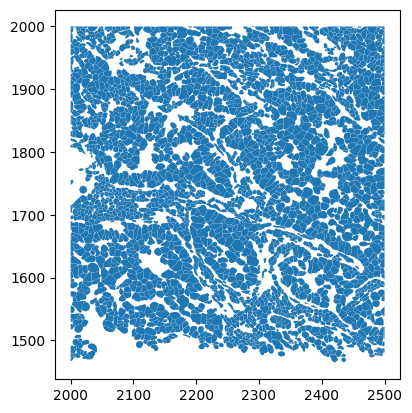

In [73]:
intersection.plot()

Let's approximates these polygons with circles of equal area to show an example of a collection of circles. Here we could use the `spatialdata.to_circle()` API, but let's use `geopandas` for the sake of showcasing some of its APIs.

In [74]:
from geopandas import GeoDataFrame

circles_series = intersection.centroid
type(circles_series)

print(circles_series)

0        POINT (2348.32 1869.371)
1       POINT (2343.963 1877.073)
2       POINT (2355.319 1872.377)
3       POINT (2364.017 1885.377)
4        POINT (2356.676 1894.42)
                  ...            
2715    POINT (2060.874 1878.053)
2716    POINT (2113.335 1944.086)
2717    POINT (2163.803 1879.264)
2718    POINT (2231.052 1933.902)
2719     POINT (2231.055 1941.83)
Length: 2720, dtype: geometry


In [75]:
circles_gdf = GeoDataFrame(
    {"radius": np.sqrt(intersection["cell_area"] / np.pi)}, geometry=circles_series
)
print(circles_gdf)

        radius                   geometry
0     4.649515   POINT (2348.32 1869.371)
1     4.727697  POINT (2343.963 1877.073)
2     5.120303  POINT (2355.319 1872.377)
3     4.933028  POINT (2364.017 1885.377)
4     4.111352   POINT (2356.676 1894.42)
...        ...                        ...
2715  2.301464  POINT (2060.874 1878.053)
2716  2.996051  POINT (2113.335 1944.086)
2717  2.531910  POINT (2163.803 1879.264)
2718  3.370812  POINT (2231.052 1933.902)
2719  4.822510   POINT (2231.055 1941.83)

[2720 rows x 2 columns]


### The `dask.DataFrame` class (*points*)
The [`dask.DataFrame` class](https://docs.dask.org/en/stable/dataframe.html) is a subclass of `pandas.DataFrame` that allows for lazy loading and lazy, distributed computation using Dask. This is used because generally points collections of spatial transcriptomics datasets are too big to be handled with regular `pandas.DataFrame` objects.

When you perform operations on a `dask.DataFrame`, they are not computed until you choose to do so.

In [82]:
ddf = sdata_xenium["transcripts"]
ddf

Dask DataFrame Structure:
                     x        y        z     feature_name cell_id codeword_index       qv overlaps_nucleus fov_name nucleus_distance transcript_id
npartitions=4                                                                                                                                     
               float32  float32  float32  category[known]  string          int32  float32            uint8   string          float32        uint64
                   ...      ...      ...              ...     ...            ...      ...              ...      ...              ...           ...
                   ...      ...      ...              ...     ...            ...      ...              ...      ...              ...           ...
                   ...      ...      ...              ...     ...            ...      ...              ...      ...              ...           ...
                   ...      ...      ...              ...     ...            ...      ...              ...      ...              ...           ...
Dask Name: assign, 29 graph layers

In [83]:
subset = ddf[ddf.feature_name == "CXCR4"][["feature_name", "cell_id"]]
subset

Dask DataFrame Structure:
                  feature_name cell_id
npartitions=4                         
               category[known]  string
                           ...     ...
                           ...     ...
                           ...     ...
                           ...     ...
Dask Name: getitem, 33 graph layers

Let's now perform the operations by calling `.compute()`.

In [84]:
df = subset.compute()
df

feature_name     cell_id
2             CXCR4  UNASSIGNED
3             CXCR4  UNASSIGNED
213           CXCR4  UNASSIGNED
214           CXCR4  UNASSIGNED
272           CXCR4  UNASSIGNED
...             ...         ...
163229        CXCR4  UNASSIGNED
163244        CXCR4  jgdldkap-1
163270        CXCR4  jgebeofm-1
163279        CXCR4  jgcgjopd-1
164996        CXCR4  UNASSIGNED

[78139 rows x 2 columns]

As you can see, `df` is a regular `pandas.DataFrame`:

In [37]:
type(df)

pandas.core.frame.DataFrame

### The `anndata.AnnData` class (*tables*)
<img src="https://raw.githubusercontent.com/scverse/anndata/main/docs/_static/img/anndata_schema.svg" width="500" height="500">

Finally we use [`AnnData` objects](https://anndata.readthedocs.io/en/latest/) to store annotations. We introduced the jargon *tables* to denotes these objects; please keep in mind that `AnnData` objects allow for storing dataframes and sparse/dense tensors.

In [85]:
adata = sdata_xenium["table"]
adata

AnnData object with n_obs × n_vars = 162254 × 377
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'z_level', 'nucleus_count', 'cell_labels'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'

Let's see some examples. A gene expression matrix can be stored the `.X` slot.

In [86]:
adata.X

<162254x377 sparse matrix of type '<class 'numpy.float32'>'
	with 4900367 stored elements in Compressed Sparse Row format>

In [87]:
adata.to_df()

ABCC11  ACE2  ACKR1  ACTA2  ACTG2  ADAM28  ADAMTS1  ADGRE1  ADGRL4  \
0          0.0   0.0    0.0    0.0    0.0     0.0      0.0     0.0     0.0   
1          0.0   0.0    0.0    0.0    1.0     0.0      0.0     0.0     0.0   
2          0.0   0.0    0.0    0.0    1.0     1.0      0.0     0.0     0.0   
3          0.0   0.0    0.0    0.0    0.0     1.0      0.0     0.0     0.0   
4          0.0   0.0    0.0    0.0    0.0     0.0      0.0     0.0     0.0   
...        ...   ...    ...    ...    ...     ...      ...     ...     ...   
162249     0.0   0.0    0.0    0.0    0.0     0.0      0.0     0.0     0.0   
162250     0.0   0.0    0.0    0.0    0.0     0.0      0.0     0.0     0.0   
162251     0.0   0.0    0.0    0.0    0.0     0.0      0.0     0.0     0.0   
162252     0.0   0.0    0.0    0.0    0.0     0.0      0.0     0.0     0.0   
162253     0.0   0.0    0.0    0.0    0.0     0.0      0.0     0.0     0.0   

        ADH1C  ...  TRAC  TREM2  TSPAN19  UBE2C  UMOD  UPK3B  VCAN  VSIG4  \
0         0.0  ...   0.0    0.0      0.0    0.0   0.0    0.0   0.0    0.0   
1         0.0  ...   2.0    0.0      0.0    0.0   0.0    0.0   0.0    0.0   
2         0.0  ...   0.0    0.0      0.0    0.0   0.0    0.0   0.0    0.0   
3         0.0  ...   0.0    0.0      0.0    0.0   0.0    0.0   0.0    0.0   
4         0.0  ...   0.0    0.0      0.0    0.0   0.0    0.0   0.0    1.0   
...       ...  ...   ...    ...      ...    ...   ...    ...   ...    ...   
162249    0.0  ...   0.0    0.0      0.0    0.0   0.0    0.0   0.0    0.0   
162250    0.0  ...   0.0    0.0      0.0    0.0   0.0    0.0   0.0    0.0   
162251    0.0  ...   0.0    0.0      0.0    0.0   0.0    0.0   0.0    0.0   
162252    0.0  ...   0.0    0.0      0.0    0.0   0.0    0.0   0.0    0.0   
162253    0.0  ...   0.0    0.0      0.0    0.0   0.0    0.0   0.0    0.0   

        VWA5A  VWF  
0         0.0  0.0  
1         0.0  0.0  
2         0.0  0.0  
3         0.0  0.0  
4         0.0  1.0  
...       ...  ...  
162249    0.0  0.0  
162250    0.0  0.0  
162251    0.0  0.0  
162252    0.0  0.0  
162253    0.0  0.0  

[162254 rows x 377 columns]

Information on the genes (=variables), is stored in the `.var` slot.

In [88]:
adata.var

gene_ids    feature_types   genome
ABCC11  ENSG00000121270  Gene Expression  Unknown
ACE2    ENSG00000130234  Gene Expression  Unknown
ACKR1   ENSG00000213088  Gene Expression  Unknown
ACTA2   ENSG00000107796  Gene Expression  Unknown
ACTG2   ENSG00000163017  Gene Expression  Unknown
...                 ...              ...      ...
UPK3B   ENSG00000243566  Gene Expression  Unknown
VCAN    ENSG00000038427  Gene Expression  Unknown
VSIG4   ENSG00000155659  Gene Expression  Unknown
VWA5A   ENSG00000110002  Gene Expression  Unknown
VWF     ENSG00000110799  Gene Expression  Unknown

[377 rows x 3 columns]

Information on the cells (=observations), is stored in the `.obs` slot.

In [89]:
adata.obs

cell_id  transcript_counts  control_probe_counts  \
0       aaaadpbp-1                  0                     0   
1       aaaaficg-1                 19                     0   
2       aaabbaka-1                 53                     0   
3       aaabbjoo-1                 29                     0   
4       aaablchg-1                 42                     0   
...            ...                ...                   ...   
162249  ojaaphhh-1                  3                     0   
162250  ojabeldf-1                  6                     0   
162251  ojacfbid-1                  0                     0   
162252  ojacfhhg-1                  2                     0   
162253  ojacpeii-1                  1                     0   

        control_codeword_counts  unassigned_codeword_counts  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             0                           1   
...                         ...                         ...   
162249                        0                           0   
162250                        0                           0   
162251                        0                           0   
162252                        0                           0   
162253                        0                           0   

        deprecated_codeword_counts  total_counts   cell_area  nucleus_area  \
0                                0             0   68.456877           NaN   
1                                0            19   49.130002     21.268595   
2                                0            53  119.618911     74.778753   
3                                0            29   94.241097     59.109533   
4                                0            43  120.341411     52.426408   
...                            ...           ...         ...           ...   
162249                           0             3   26.913126     11.153594   
162250                           0             6    5.418750      5.418750   
162251                           0             0    6.502500      6.502500   
162252                           0             2    7.089532      7.089532   
162253                           0             1    6.683125      6.683125   

              region  z_level  nucleus_count  cell_labels  
0       cell_circles      0.0            0.0            1  
1       cell_circles      0.0            1.0            2  
2       cell_circles      0.0            1.0            3  
3       cell_circles      0.0            1.0            4  
4       cell_circles      0.0            1.0            5  
...              ...      ...            ...          ...  
162249  cell_circles      5.0            1.0       162250  
162250  cell_circles      7.0            1.0       162251  
162251  cell_circles      5.0            1.0       162252  
162252  cell_circles      5.0            1.0       162253  
162253  cell_circles      5.0            1.0       162254  

[162254 rows x 13 columns]

The slot `.uns` can contain unstructured data. In particular it contains some metadata that is used to link tables to the spatial elements (e.g. cell segmentation masks) that they annotate.

In [90]:
adata.uns

OrderedDict([('spatialdata_attrs',
              {'region': 'cell_circles',
               'region_key': 'region',
               'instance_key': 'cell_id'})])

### Lazy vs non-lazy objects

Currently, images, labels and points elements are always represented lazily using Dask, while shapes and tables elements are always loaded in memory. We saw this already for points, let's see this for images:

In [92]:
image = sdata_merfish["rasterized"]
print(image.data)
image.data

dask.array<from-zarr, shape=(1, 522, 575), dtype=uint8, chunksize=(1, 522, 575), chunktype=numpy.ndarray>


dask.array<from-zarr, shape=(1, 522, 575), dtype=uint8, chunksize=(1, 522, 575), chunktype=numpy.ndarray>

As you can see, xarray is using dask internally. You can compute the data as follows:

In [93]:
# produces an xarray object that is fully-loaded in memory
image.compute()

<xarray.DataArray 'image' (c: 1, y: 522, x: 575)> Size: 300kB
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)
Coordinates:
  * c        (c) int64 8B 0
  * y        (y) float64 4kB 0.5 1.5 2.5 3.5 4.5 ... 518.5 519.5 520.5 521.5
  * x        (x) float64 5kB 0.5 1.5 2.5 3.5 4.5 ... 571.5 572.5 573.5 574.5
Attributes:
    transform:  {'global': Sequence \n    Scale (c, y, x)\n        [1.       ...

In [94]:
# accesses the data inside xarray, as a numpy array object
x = image.compute().data
print(type(x))
x

<class 'numpy.ndarray'>


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

### The convenience of the spatialdata APIs

As we saw above, we can use native geospatial APIs to manipulate the elements of a `SpatialData` object. The `spatialdata` library adds a layer of convenience to the above by allowing, among others to:
1. provide a bundled representation of raster types, vector types and annotations
2. serialize the data on disk, following the NGFF specification as close as possible
3. defining coordinate systems and coordinate transformations
4. enabling APIs that operate seamlessly on the various data types.

Let's focus on the last two points.

Let's remake the plot made before using `xarray` using with `spatialdata-plot`, a library that we developed for convenient plotting of `SpatialData` objects.

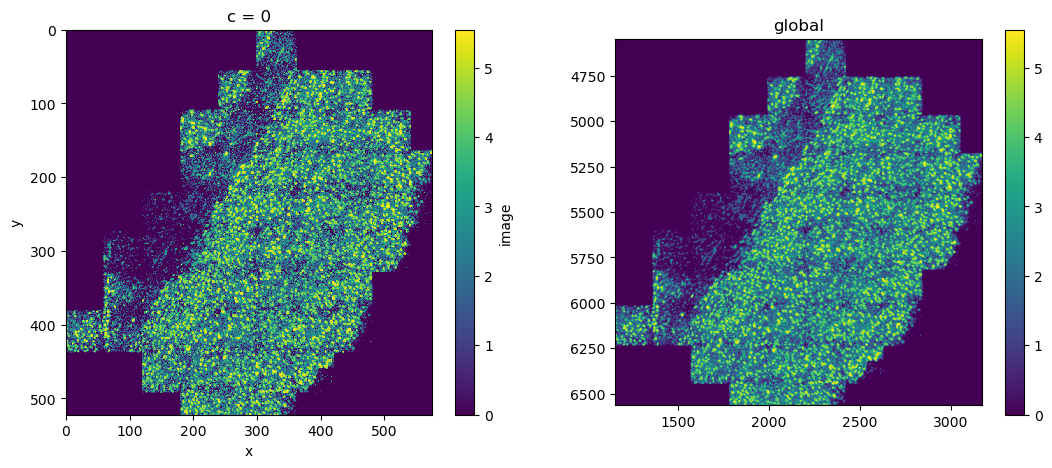

In [ ]:
import spatialdata_plot

axes = plt.subplots(1, 2, figsize=(13, 5))[1]

# plotting using the xarray APIs
log_image.plot(ax=axes[0])
axes[0].invert_yaxis()

# plotting using the spatialdata-plot APIs
sdata_merfish.pl.render_images("log_image").pl.show(ax=axes[1])

plt.show()

One difference between the plots above is that coordinates of the second plot take into account for the coordinate transformation metadata available in the object, while the `xarray.DataArray` object don't.

In fact, the coordinate transformations are a feature introduced by the `spatialdata` framework, and `xarray` is unaware of them. Practically, when working with native objects you should keep in mind that coordinate transformations needs to be manually taken into account and eventually adjusted by you. If you use the `spatialdata`/`napari-spatialdata`/`spaitaldata-plot` APIs, this is done automatically.

This gives the user a layer of convenience function, that can be powerfully extended using native geospatial APIs when needed.

In [ ]:
sdata_merfish["rasterized"]

<xarray.DataArray 'image' (c: 1, y: 522, x: 575)>
dask.array<from-zarr, shape=(1, 522, 575), dtype=uint8, chunksize=(1, 522, 575), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) int64 0
  * y        (y) float64 0.5 1.5 2.5 3.5 4.5 ... 517.5 518.5 519.5 520.5 521.5
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 570.5 571.5 572.5 573.5 574.5
Attributes:
    transform:  {'global': Sequence \n    Scale (c, y, x)\n        [1.       ...

In [ ]:
# in the example above, the coordiante transformations are accessible in the object's attribute; we will show a dedicated notebook on how to manipulate the coordinate transformations
sdata_merfish["rasterized"].attrs

{'transform': {'global': Sequence 
      Scale (c, y, x)
          [1.         3.86311352 3.50777513]
      Translation (c, y, x)
          [   0. 4548. 1154.]}}

Let's see two more of convenience functions given by the `spatialdata` APIs are the following. This is just a quick overview.

First, `spatialdata` query APIs allow to subset the data spatially. Before we had to do it manually using `geopandas.overlay`. The query APIs are aware of the coordinate transformations specified wihtin the data (while if we use `geopandas.overlay` or `xarray.sel` we need to manually take into account for coordinate transformations.

In [ ]:
sdata_merfish

SpatialData object, with associated Zarr store: /Users/macbook/embl/projects/basel/spatialdata-workshops/data/merfish.zarr
├── Images
│     ├── 'log_image': DataArray[cyx] (1, 522, 575)
│     └── 'rasterized': DataArray[cyx] (1, 522, 575)
├── Points
│     └── 'single_molecule': DataFrame with shape: (<Delayed>, 3) (2D points)
├── Shapes
│     ├── 'anatomical': GeoDataFrame shape: (6, 1) (2D shapes)
│     └── 'cells': GeoDataFrame shape: (2389, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (2389, 268)
with coordinate systems:
    ▸ 'global', with elements:
        log_image (Images), rasterized (Images), single_molecule (Points), anatomical (Shapes), cells (Shapes)
with the following Dask-backed elements not being self-contained:
    ▸ log_image: /Users/macbook/embl/projects/basel/spatialdata-workshops/data/merfish.zarr/images/rasterized
with the following elements not in the Zarr store:
    ▸ log_image (Images)

In [ ]:
from spatialdata import polygon_query
from shapely import Polygon
import spatialdata_plot

polygon = Polygon([(2200, 5000), (2500, 5500), (2800, 5000)])

sdata_cropped = polygon_query(
    sdata_merfish,
    polygon=polygon,
    target_coordinate_system="global",
    clip=True,
)
sdata_cropped

SpatialData object
├── Images
│     ├── 'log_image': DataArray[cyx] (1, 129, 171)
│     └── 'rasterized': DataArray[cyx] (1, 129, 171)
├── Points
│     └── 'single_molecule': DataFrame with shape: (<Delayed>, 3) (2D points)
├── Shapes
│     ├── 'anatomical': GeoDataFrame shape: (3, 1) (2D shapes)
│     └── 'cells': GeoDataFrame shape: (181, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (181, 268)
with coordinate systems:
    ▸ 'global', with elements:
        log_image (Images), rasterized (Images), single_molecule (Points), anatomical (Shapes), cells (Shapes)

Second, `spatialdata-plot` allows to use the same syntax to combine complex plots together, and specify which annotations to show. In particular, when using `spatialdata-plot` the user doesn't have to worry if the table is annotating some labels (raster geometries) or some points/shapes; the library will take care to render the annotations in all those cases.

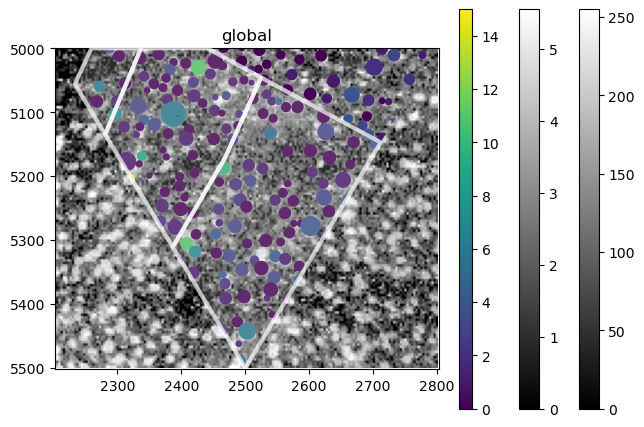

In [ ]:
sdata_cropped.pl.render_images(cmap="grey").pl.render_shapes(
    "cells",
    color="Acta2",
).pl.render_shapes(
    "anatomical",
    fill_alpha=0.2,
    outline_alpha=0.7,
    outline=True,
    outline_color="white",
    outline_width=3.0,
).pl.show()

## Futher reading
As mentioned before, we invite the readers to become familiar with the geospatial Python data structures that we use in the `spatialdata` library.
In the next tutorials we will explore various functions enabled by the `spatialdata` framework; anyway for a deeper introduction we kindly point you to the [notebooks section](https://spatialdata.scverse.org/en/latest/tutorials/notebooks/notebooks.html) of the documentation, and in particular to the following notebooks, which explain in detail how to create `SpatialData` objects from screatch and manipulate them:

- [In depth introduction to `SpatialData` objects](https://spatialdata.scverse.org/en/latest/tutorials/notebooks/notebooks/examples/models1.html).
- [In depth introduction to spatial elements and models (`.parse()`, `.validate()`)](https://spatialdata.scverse.org/en/latest/tutorials/notebooks/notebooks/examples/models2.html).
- [Annotating elements and manipulating annotations](https://spatialdata.scverse.org/en/latest/tutorials/notebooks/notebooks/examples/tables.html).

Furthermore, you can find curated code examples by checking the various [readers available in the `spatialdata-io` library](https://github.com/scverse/spatialdata-io/tree/main/src/spatialdata_io/readers).

Finally, for a deeper description of all the available functions, please consult the [API documentation](https://spatialdata.scverse.org/en/latest/api.html).